# 11.2 COOPERATIVE BINDING DATA

Use this notebook to store your work for this problem.

In [2]:
#*************************************************************
# Mario Segura
# Problem 11.2

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Image processing Function

from scipy.signal import convolve

# Import 3D plotting tool

from mpl_toolkits.mplot3d import Axes3D

# Random Generator

from numpy.random import default_rng
rng = default_rng()
rand = rng.random


## (a) Fit by eye

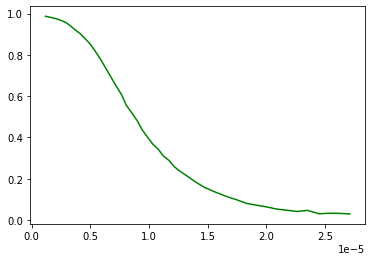

In [26]:
# Loading Data
Data = np.loadtxt('hemoglobin.csv', delimiter = ',')
Div = np.hsplit(Data,2)
Con = Div[0].flatten()
P = Div[1].flatten()

plt.plot(Con,P,'g')

In [27]:
# Guessed Function
k_d = .0025
c_bar = (Con**P)/k_d

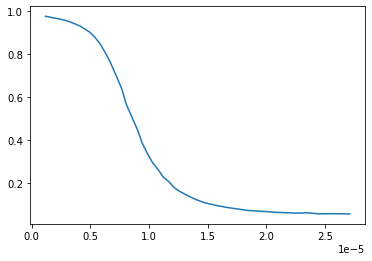

In [28]:
n = 0.5
p = 1/(1+c_bar**n)
plt.figure()
plt.plot(Con,p)

## (b) Least-squares fit

In [29]:
A = np.vstack([Con, np.ones(len(Con))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(P), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}\nbeta={beta}')

alpha=1.6922459435929074
beta=-157254.48622209055


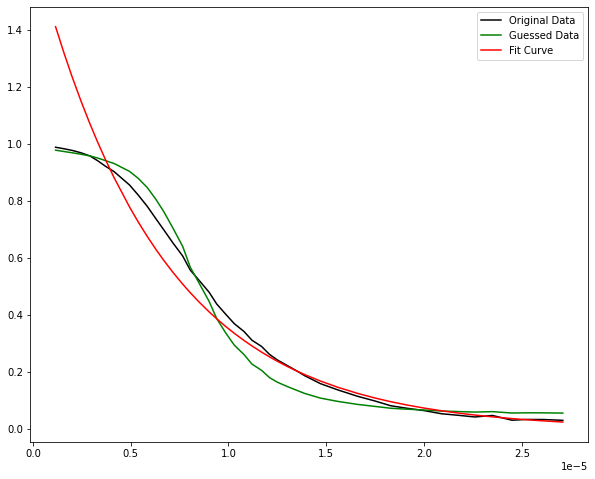

In [37]:
plt.figure(figsize = (10,8))
plt.plot(Con, P, label = 'Original Data', color='black')
plt.plot(Con, p, label = 'Guessed Data', color ='green')
plt.plot(Con, alpha*np.exp(beta*Con), label = 'Fit Curve', color ='red')
plt.legend(loc="upper right")